# Lab Assignment Three: Extending Logistic Regression

*Yiwen Xu, Kehan Zhang, Shuang Liang, Christopher Deng Jr*

## 1. Preparation and Overview

### 1.1 Business Understanding

For the world, abalone and the related processing industry is a huge chain of interests.

About 70 percent of the abalone consumed worldwide is farmed. Abalone aquaculture began in Japan and China in the late 1950s, and now more than 80 percent of farmed abalone originates from China. The mollusk is also raised in South Korea, South Africa, Taiwan, Australia, Chile and the United States.[via]

We find out the Abalone Data Set may be helpful, this data set comes from an original (non-machine-learning) study:
Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994)
"The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait",
Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288)

When we get this dataset, from the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

The dataset contain the information about Sex, Length, Diameter, Height, Whole Height, Shucked Height, Viscera Weight, Shell Weight and Rings. All values are measured manually. Abalone Rings are closely related to age, which is the number of rings plus 1.5, but identification of ring number requires biologists to cut the shell, stain it, and count the number of rings through a microscope, which is a boring and time-consuming task. Therefore, the purpose of this experiment is to be able to predict the number of rings (+1.5 which is the age of the abalone) using physical data such as abalone morphological data such as body length, weight, etc. which do not require high expertise and are relatively easy to measure, thus saving more time and labor costs. This is of great discussion value for the whole abalone production and culture industry.

For this lab, we use 4 different logistic regression methods: steepest ascent, stochastic gradient ascent,Newton's method, and Quasi Newton method to try to predict the number of rings of abalones. We classify the abalones based on number of rings into 3 categories: 1-7(unmatrue), 8-11(mature), and 12-29(excellent). With the number of rings being predicited, the age of the abalones can be easily calculated. Abalone farmers, aquatic Merchants and individual buyers will all be interested in this classification. This classfication can be delopyed into live production, as an APP, or even a website. Abalone farmers and merchants can use this to help them save massive amount of labor and save a lot of money when they are harvesting abalones on the field; individual buyers can use this to help them decide when buying abalones and make sure they get what they payed for. 

[via]:https://www.seafoodsource.com/news/environment-sustainability/abalone-aquaculture-dialogue-now-underway

### 1.2 Define and prepare your class variables

#### Load the abalone dataset

In [1]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('abalone_replace.csv')
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,3,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,3,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,3,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.991621,0.796410,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


As we can see from the table above, the range of rings from which we will derive class label is 1 to 29. According to International Abalone Society(IAS), it usually takes 8 years for abalones to become matural and ready to be fished, and abalones whose age is above 13 years old is excellent for consuming. With relationhip between rings and age: number of rings plus 1.5 is the age of the abalone, we divide instances in our dataset to three classes based on number of rings. 
We create a new feature named 'Age_predict', which is the class label. Abalones with the number of rings ranges from 1 to 7 belongs to class 0, abalones with the number of rings ranges from 8 to 11 belongs to class 1, and abalones with the number of rings ranges from 12 to 29 belongs to class 2.

In [3]:
df['Age_predict'] = pd.cut(df['Rings'], [0,7,11,29], labels=[0, 1, 2])
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age_predict
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,3,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0
...,...,...,...,...,...,...,...,...,...,...
4172,3,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,3,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


#### Show the number of instances each class have

In [4]:
df.groupby(['Age_predict'],as_index=False)['Age_predict'].agg({'cnt':'count'})

,Age_predict,cnt
0,0,839
1,1,2378
2,2,960


#### Show data quality

In [5]:
df.isnull().values.sum()

0

In [6]:
dup_index = df.duplicated()
len(df[dup_index])

0

As we can see from above, there is no missing data and duplicate data.

#### Dimensionality Reduction

In [7]:
# pip instal eli5
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt

In [8]:
x = df.drop(['Rings', 'Age_predict'], axis = 1)
y = df.Rings
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

model = RandomForestClassifier(n_estimators = 100, random_state = 1).fit(x_train, y_train)
perm = PermutationImportance(model, random_state = 1).fit(x, y)
eli5.show_weights(perm, feature_names = x.columns.tolist())

Weight,Feature
0.2489 ± 0.0159,Shell_weight
0.1744 ± 0.0142,Shucked_weight
0.0958 ± 0.0074,Diameter
0.0902 ± 0.0060,Viscera_weight
0.0795 ± 0.0069,Height
0.0728 ± 0.0066,Whole_weight
0.0625 ± 0.0050,Length
0.0588 ± 0.0077,Sex


<BarContainer object of 8 artists>

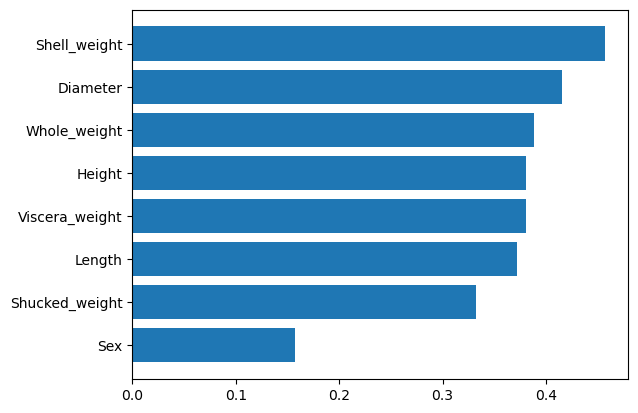

In [9]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

score = pd.DataFrame(mutual_info_regression(x, y, discrete_features = False, random_state = 1), index = x.columns, columns = ['mi_score']).sort_values('mi_score', ascending = True)
plt.barh(score.index, score.mi_score)

From the feature weighting table and graph generated above, we can clearly see the weighting rank of all features. We can tell that shell weight is the most important feature that affect the predicting result of rings, while sex is the least important feature. The importance rank of other features is: diameter, whole weight, height, viscera weight, lenbgth, shucked weight. We choose the top 6 here, which are shell weight, diameter, whole weight, height, viscera weight and length.

In [10]:
df_update = df[['Shell_weight', 'Diameter', 'Whole_weight', 'Height', 'Viscera_weight', 'Length', 'Age_predict']]
df_update

,Shell_weight,Diameter,Whole_weight,Height,Viscera_weight,Length,Age_predict
0,0.1500,0.365,0.5140,0.095,0.1010,0.455,2
1,0.0700,0.265,0.2255,0.090,0.0485,0.350,0
2,0.2100,0.420,0.6770,0.135,0.1415,0.530,1
3,0.1550,0.365,0.5160,0.125,0.1140,0.440,1
4,0.0550,0.255,0.2050,0.080,0.0395,0.330,0
...,...,...,...,...,...,...,...
4172,0.2490,0.450,0.8870,0.165,0.2390,0.565,1
4173,0.2605,0.440,0.9660,0.135,0.2145,0.590,1
4174,0.3080,0.475,1.1760,0.205,0.2875,0.600,1
4175,0.2960,0.485,1.0945,0.150,0.2610,0.625,1


### 1.3 Divide Data

In [11]:
from sklearn.model_selection import ShuffleSplit

if 'Age_predict' in df_update:
    y = df_update['Age_predict']
    y = y.to_numpy()
    del df_update['Age_predict']
    norm_features = ['Shell_weight', 'Diameter', 'Whole_weight', 'Height', 'Viscera_weight', 'Length']
    df_update[norm_features] = (df_update[norm_features] - df_update[norm_features].mean()) / df_update[norm_features].std()
    X = df_update.to_numpy()

print('Normalized Data:\n', df_update)

num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations, test_size = 0.2)
                         
print(cv_object)

Normalized Data:
       Shell_weight  Diameter  Whole_weight    Height  Viscera_weight    Length
0        -0.638140 -0.432097     -0.641821 -1.064297       -0.726125 -0.574489
1        -1.212842 -1.439757     -1.230130 -1.183837       -1.205077 -1.448812
2        -0.207114  0.122116     -0.309432 -0.107978       -0.356647  0.050027
3        -0.602222 -0.432097     -0.637743 -0.347058       -0.607527 -0.699393
4        -1.320599 -1.540523     -1.271933 -1.422916       -1.287183 -1.615350
...            ...       ...           ...       ...             ...       ...
4172      0.073053  0.424414      0.118799  0.609261        0.532836  0.341468
4173      0.155666  0.323648      0.279896 -0.107978        0.309325  0.549640
4174      0.496895  0.676328      0.708127  1.565580        0.975296  0.632909
4175      0.410690  0.777094      0.541933  0.250642        0.733540  0.841081
4176      1.840260  1.482456      2.283407  1.326500        1.787235  1.548867

[4177 rows x 6 columns]
ShuffleSp

In [12]:
from sklearn import metrics as mt
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')

iter_num = 1
accuracy = []
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(X_train,y_train)
    y_hat = lr_clf.predict(X_test)

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    accuracy.append(acc)
    print("====Iteration",iter_num,"====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num += 1

====Iteration 1 ====
accuracy 0.7033492822966507
confusion matrix
 [[125  59   0]
 [ 41 403  25]
 [  1 122  60]]
====Iteration 2 ====
accuracy 0.6901913875598086
confusion matrix
 [[107  51   0]
 [ 40 405  27]
 [  2 139  65]]
====Iteration 3 ====
accuracy 0.7105263157894737
confusion matrix
 [[105  52   0]
 [ 32 434  23]
 [  2 133  55]]
====Iteration 4 ====
accuracy 0.7188995215311005
confusion matrix
 [[123  58   0]
 [ 29 414  22]
 [  0 126  64]]
====Iteration 5 ====
accuracy 0.6830143540669856
confusion matrix
 [[107  65   2]
 [ 34 394  41]
 [  1 122  70]]
====Iteration 6 ====
accuracy 0.6997607655502392
confusion matrix
 [[123  53   1]
 [ 29 403  32]
 [  3 133  59]]
====Iteration 7 ====
accuracy 0.7009569377990431
confusion matrix
 [[100  54   1]
 [ 35 438  31]
 [  3 126  48]]
====Iteration 8 ====
accuracy 0.7069377990430622
confusion matrix
 [[110  53   1]
 [ 47 414  22]
 [  2 120  67]]
====Iteration 9 ====
accuracy 0.7272727272727273
confusion matrix
 [[141  47   0]
 [ 39 397  27]

In [13]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3341, 6)
y_train shape:  (3341,)
X_test shape:  (836, 6)
y_test shape:  (836,)


In [14]:
print("Variance of Accuracy: ", np.var(accuracy))
print("Standard Deviation of Accuracy: ", np.std(accuracy))

Variance of Accuracy:  0.00015172500629564368
Standard Deviation of Accuracy:  0.012317670489814365


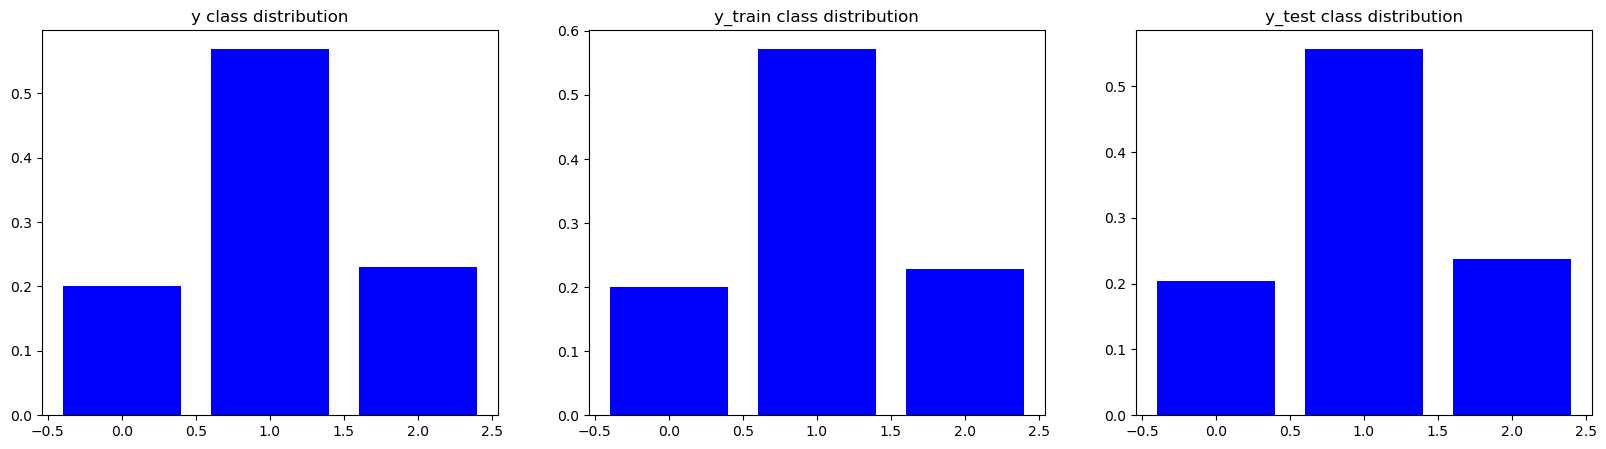

In [15]:
fig = plt.figure(figsize=(20,5))

# show distribution of different classes in original dataset
plt.subplot(1, 3, 1)
y_classes, y_count = np.unique(y, return_counts=True)
plt.title("y class distribution")
plt.bar(y_classes, y_count / sum(y_count), color='blue')

# show distribution of different classes in train dataset
plt.subplot(1, 3, 2)
ytrain_classes, ytrain_count = np.unique(y_train, return_counts=True)
plt.title("y_train class distribution")
plt.bar(ytrain_classes, ytrain_count / sum(ytrain_count), color='blue')

# show distribution of different classes in test dataset
plt.subplot(1, 3, 3)
ytest_classes, ytest_count = np.unique(y_test, return_counts=True)
plt.title("y_test class distribution")
plt.bar(ytest_classes, ytest_count / sum(ytest_count), color='blue')

plt.show()

After using the cross validation with 10 iterations, we can get the variance and standard deviation of the accuracy. Since both variance and standard are pretty small, we can say that 80/20 split is stable on our dataset. From the three graphs shown above, classes distirbution of original dataset, training dataset and test dataset is the same. That means 80/20 split doesn't change the classes distribution of original dataset. Therefore, 80/20 split is appropriate for our dataset.

## 2. Modeling

### 2.1 Build Model

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.special import expit

#### 2.1.1 Binary Logistic Regression 

In [17]:
# from last time, our logistic regression algorithm is given by (including everything we previously had):
class BinaryLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.001, regularization = 0):
        self.eta = eta
        self.iters = iterations
        self.C = C
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        self.regularization = regularization
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # vectorized gradient calculation with regularization using L2 Norm
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        # no regularization
        if self.regularization == 0:
            gradient = gradient
        # L1
        elif self.regularization == 1:
            gradient[1:] += -np.sign(self.w_[1:]) * self.C
        # L2
        elif self.regularization == 2:   
            gradient[1:] += -2 * self.w_[1:] * self.C
        # L1 & L2
        elif self.regularization == 3:
            gradient[1:] += -2 * self.w_[1:] * self.C - np.sign(self.w_[1:]) * self.C
        
        return gradient
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 
            # add bacause maximizing  
            

#### 2.1.2 Steepest Ascent Logistic Regression 

In [18]:
# and we can update this to use a line search along the gradient like this:
from scipy.optimize import minimize_scalar
import copy
from numpy import ma # (masked array) this has most numpy functions that work with NaN data.

class SteepestAscentLogisticRegression(BinaryLogisticRegression):
    
    # define custom line search for problem
    def __init__(self, line_iters=0.0, **kwds):        
        self.line_iters = line_iters
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
    
    # this defines the function with the first input to be optimized
    # therefore eta will be optimized, with all inputs constant
    @staticmethod
    def objective_function(eta,X,y,w,grad,C,regularization):
        wnew = w - grad*eta
        g = expit(X @ wnew)
        old = -np.sum(ma.log(g[y==1]))-ma.sum(np.log(1-g[y==0]))
        
        if regularization == 0:
            new = old 
        elif regularization == 1:
            new = old + C*sum(abs(wnew))
        elif regularization == 2:
            new = old + C*sum(wnew**2)
        elif regularization == 3:
            new = old + C*sum(abs(wnew)) + C*sum(wnew**2)
        
        return new
    
        
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = -self._get_gradient(Xb,y)
            # minimization inopposite direction
            
            # do line search in gradient direction, using scipy function
            opts = {'maxiter':self.line_iters} # unclear exactly what this should be
            res = minimize_scalar(self.objective_function, # objective function to optimize
                                  bounds=(0,self.eta*10), #bounds to optimize
                                  args=(Xb,y,self.w_,gradient,self.C,self.regularization), # additional argument for objective function
                                  method='bounded', # bounded optimization for speed
                                  options=opts) # set max iterations
            
            eta = res.x # get optimal learning rate
            self.w_ -= gradient*eta # set new function values
            # subtract to minimize
                    

#### 2.1.3 Stochastic Gradient Ascent

In [19]:
class StochasticLogisticRegression(BinaryLogisticRegression):
    # stochastic gradient calculation 
    def _get_gradient(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through  
        gradient = gradient.reshape(self.w_.shape)
        
        if self.regularization == 0:
            gradient = gradient
        elif self.regularization == 1:
            gradient[1:] += -np.sign(self.w_[1:]) * self.C
        elif self.regularization == 2:
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.regularization == 3:
            gradient[1:] += -np.sign(self.w_[1:]) * self.C - 2 * self.w_[1:] * self.C
        
        return gradient
    

#### 2.1.4 Hessian Binary Logistic Regression (Newton's Method)

In [20]:
from numpy.linalg import pinv
class HessianBinaryLogisticRegression(BinaryLogisticRegression):
    # just overwrite gradient function
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        if self.regularization == 0:
            gradient = gradient
        elif self.regularization == 1:
            gradient[1:] += -np.sign(self.w_[1:]) * self.C
        elif self.regularization == 2:
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.regularization == 3:
            gradient[1:] += -np.sign(self.w_[1:]) * self.C - 2 * self.w_[1:] * self.C
        
        return pinv(hessian) @ gradient
       

#### 2.1.5 BFGS Binary Logistic Regression (Quasi-Newton Method) 

In [21]:
# for this, we won't perform our own BFGS implementation 
# (it takes a fair amount of code and understanding, which we haven't setup yet)
# luckily for us, scipy has its own BFGS implementation:
from scipy.optimize import fmin_bfgs # maybe the most common bfgs algorithm in the world
from numpy import ma
class BFGSBinaryLogisticRegression(BinaryLogisticRegression):
    
    @staticmethod
    def objective_function(w,X,y,C,regularization):
        g = expit(X @ w)
        
        #-np.sum(y*np.log(g)+(1-y)*np.log(1-g))
        old = -np.sum(ma.log(g[y==1]))-np.sum(ma.log(1-g[y==0]))
        
        # invert this because scipy minimizes, but we derived all formulas for maximzing
        if regularization == 0:
            new = old
        elif regularization == 1:
            new = old + C*sum(abs(w))
        elif regularization == 2:
            new = old + C*sum(w**2)
        elif regularization == 3:
            new = old + C*sum(w**2)+ C*sum(abs(w))
        return new
        

    @staticmethod
    def objective_gradient(w,X,y,C,regularization):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        
        if regularization == 0:
            gradient = gradient
        elif regularization == 1:
            gradient[1:] += -np.sign(w[1:]) * C
        elif regularization == 2:
            gradient[1:] += -2 * w[1:] * C
        elif regularization == 3:
            gradient[1:] += -np.sign(w[1:]) * C - 2 * w[1:] * C
            
        return -gradient
    
    # just overwrite fit function
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                            np.zeros((num_features,1)), # starting point
                            fprime=self.objective_gradient, # gradient function
                            args=(Xb,y,self.C,self.regularization), # extra args for gradient and objective function
                            gtol=1e-03, # stopping criteria for gradient, |v_k|
                            maxiter=self.iters, # stopping criteria iterations
                            disp=False)
        
        self.w_ = self.w_.reshape((num_features,1))
            

#### 2.1.6 Multiclass Logistic Regression

In [22]:
# allow for the user to specify the algorithm they want to sovle the binary case
class MultiClassLogisticRegression:
    def __init__(self, eta, iterations=20, 
                 C=0.0001, 
                 solver=None,
                 regularization = 0,
                 line_iters = 0):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.solver = solver
        self.classifiers_ = []
        self.regularization = regularization
        self.line_iters = line_iters
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = np.array(y==yval).astype(int) # create a binary problem
            # train the binary classifier for different class
            if self.line_iters == 0:
                lr = self.solver(eta=self.eta,iterations=self.iters,C=self.C,regularization=self.regularization)
            else:
                lr = self.solver(eta=self.eta,iterations=self.iters,C=self.C,regularization=self.regularization,line_iters=self.line_iters)
            
            lr.fit(X,y_binary)

            # add the trained classifier to the list
            self.classifiers_.append(lr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for lr in self.classifiers_:
            probs.append(lr.predict_proba(X).reshape((len(X),1))) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row
    

### 2.2 Train Model 

#### 2.2.1 Adjust the optimization technique and the "C"

In [23]:
eta_test = 0.1
iterations_test = 100

Here we keep the `eta = 0.1` and `iterations = 100` to train the model using the the different solver and variety of C (cost) value. And record the highest accuracy.

Steepest Ascent Logistic Regression
regularizations: None
========C does not matter ==================
C: 10.0000 	Average acc: 0.689593
regularizations: L1
C: 0.0000 	Average acc: 0.685048
C: 0.0000 	Average acc: 0.695335
C: 0.0000 	Average acc: 0.696890
C: 0.0001 	Average acc: 0.687799
C: 0.0002 	Average acc: 0.691627
C: 0.0004 	Average acc: 0.693301
C: 0.0008 	Average acc: 0.695694
C: 0.0016 	Average acc: 0.684809
C: 0.0034 	Average acc: 0.688158
C: 0.0070 	Average acc: 0.690550
C: 0.0144 	Average acc: 0.672249
C: 0.0298 	Average acc: 0.676196
C: 0.0616 	Average acc: 0.654665
C: 0.1274 	Average acc: 0.629904
C: 0.2637 	Average acc: 0.608612
C: 0.5456 	Average acc: 0.616507
C: 1.1288 	Average acc: 0.631100
C: 2.3357 	Average acc: 0.607416
C: 4.8329 	Average acc: 0.609211
C: 10.0000 	Average acc: 0.395455


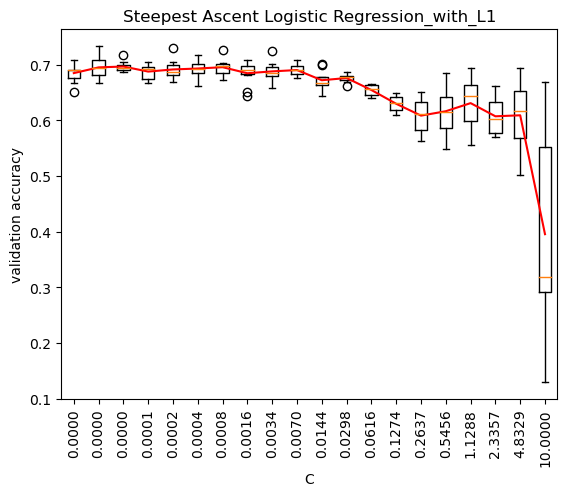

regularizations: L2
C: 0.0000 	Average acc: 0.697608
C: 0.0000 	Average acc: 0.688636
C: 0.0000 	Average acc: 0.696531
C: 0.0001 	Average acc: 0.700120
C: 0.0002 	Average acc: 0.695694
C: 0.0004 	Average acc: 0.692823
C: 0.0008 	Average acc: 0.690550
C: 0.0016 	Average acc: 0.696890
C: 0.0034 	Average acc: 0.689833
C: 0.0070 	Average acc: 0.685048
C: 0.0144 	Average acc: 0.679785
C: 0.0298 	Average acc: 0.677512
C: 0.0616 	Average acc: 0.667105
C: 0.1274 	Average acc: 0.647010
C: 0.2637 	Average acc: 0.641029
C: 0.5456 	Average acc: 0.597488
C: 1.1288 	Average acc: 0.571411
C: 2.3357 	Average acc: 0.564115
C: 4.8329 	Average acc: 0.563397
C: 10.0000 	Average acc: 0.242703


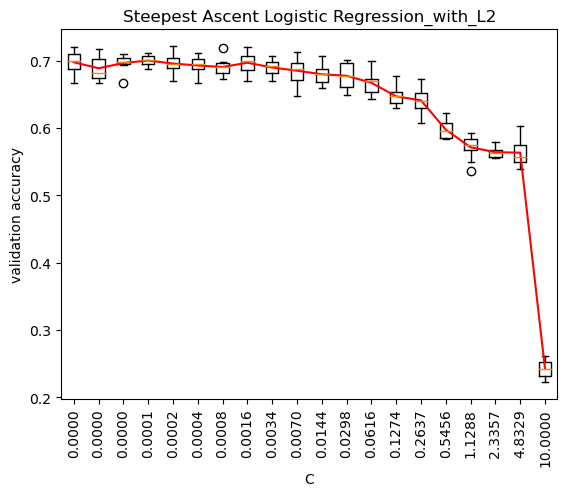

regularizations: L1&L2
C: 0.0000 	Average acc: 0.692344
C: 0.0000 	Average acc: 0.690311
C: 0.0000 	Average acc: 0.694498
C: 0.0001 	Average acc: 0.686364
C: 0.0002 	Average acc: 0.696172
C: 0.0004 	Average acc: 0.693182
C: 0.0008 	Average acc: 0.701555
C: 0.0016 	Average acc: 0.698804
C: 0.0034 	Average acc: 0.684211
C: 0.0070 	Average acc: 0.680024
C: 0.0144 	Average acc: 0.666627
C: 0.0298 	Average acc: 0.662440
C: 0.0616 	Average acc: 0.642943
C: 0.1274 	Average acc: 0.577751
C: 0.2637 	Average acc: 0.612919
C: 0.5456 	Average acc: 0.644019
C: 1.1288 	Average acc: 0.610646
C: 2.3357 	Average acc: 0.548325
C: 4.8329 	Average acc: 0.238038
C: 10.0000 	Average acc: 0.233971


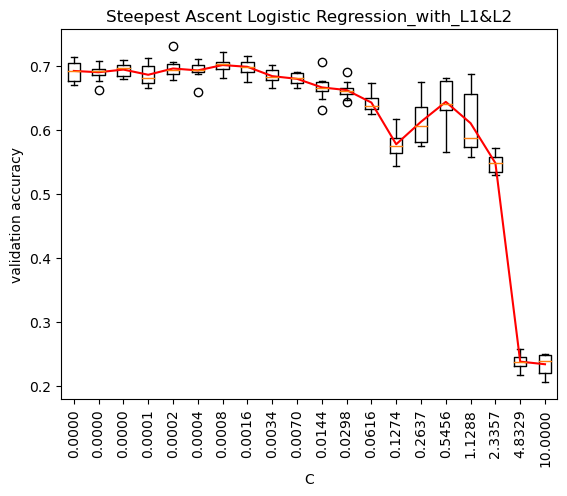


The higher acc one:  {'regularizations': 'L1&L2', 'C': 0.0007847599703514606, 'Average acc': 0.7015550239234449}
Stochastic Logistic Regression
regularizations: None
========C does not matter ==================
C: 10.0000 	Average acc: 0.649043
regularizations: L1
C: 0.0000 	Average acc: 0.634689
C: 0.0000 	Average acc: 0.651077
C: 0.0000 	Average acc: 0.665789
C: 0.0001 	Average acc: 0.648206
C: 0.0002 	Average acc: 0.652033
C: 0.0004 	Average acc: 0.644737
C: 0.0008 	Average acc: 0.658493
C: 0.0016 	Average acc: 0.657177
C: 0.0034 	Average acc: 0.655144
C: 0.0070 	Average acc: 0.665431
C: 0.0144 	Average acc: 0.655144
C: 0.0298 	Average acc: 0.634689
C: 0.0616 	Average acc: 0.639952
C: 0.1274 	Average acc: 0.633254
C: 0.2637 	Average acc: 0.593182
C: 0.5456 	Average acc: 0.571531
C: 1.1288 	Average acc: 0.576675
C: 2.3357 	Average acc: 0.575359
C: 4.8329 	Average acc: 0.564593
C: 10.0000 	Average acc: 0.505622


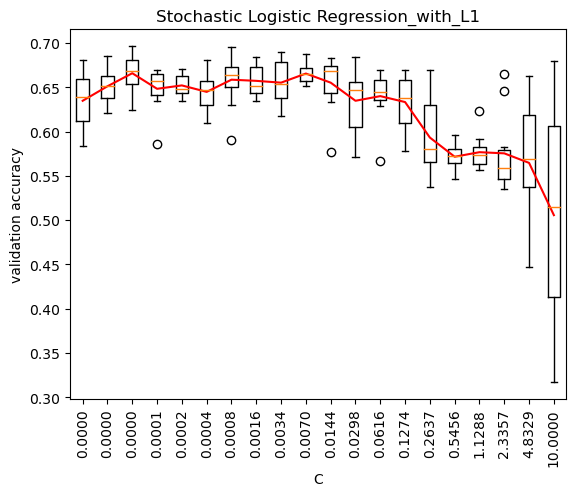

regularizations: L2
C: 0.0000 	Average acc: 0.646651
C: 0.0000 	Average acc: 0.652632
C: 0.0000 	Average acc: 0.646770
C: 0.0001 	Average acc: 0.665191
C: 0.0002 	Average acc: 0.654904
C: 0.0004 	Average acc: 0.643660
C: 0.0008 	Average acc: 0.661005
C: 0.0016 	Average acc: 0.645574
C: 0.0034 	Average acc: 0.651914
C: 0.0070 	Average acc: 0.644737
C: 0.0144 	Average acc: 0.643182
C: 0.0298 	Average acc: 0.649522
C: 0.0616 	Average acc: 0.643541
C: 0.1274 	Average acc: 0.645813
C: 0.2637 	Average acc: 0.631818
C: 0.5456 	Average acc: 0.603230
C: 1.1288 	Average acc: 0.601196
C: 2.3357 	Average acc: 0.574761
C: 4.8329 	Average acc: 0.565550
C: 10.0000 	Average acc: 0.445694


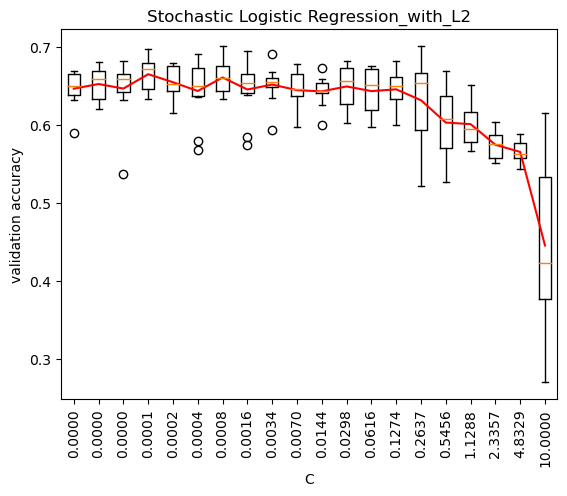

regularizations: L1&L2
C: 0.0000 	Average acc: 0.650957
C: 0.0000 	Average acc: 0.653828
C: 0.0000 	Average acc: 0.670096
C: 0.0001 	Average acc: 0.644378
C: 0.0002 	Average acc: 0.642703
C: 0.0004 	Average acc: 0.637440
C: 0.0008 	Average acc: 0.655742
C: 0.0016 	Average acc: 0.666746
C: 0.0034 	Average acc: 0.655861
C: 0.0070 	Average acc: 0.641866
C: 0.0144 	Average acc: 0.644019
C: 0.0298 	Average acc: 0.642105
C: 0.0616 	Average acc: 0.624402
C: 0.1274 	Average acc: 0.603708
C: 0.2637 	Average acc: 0.569019
C: 0.5456 	Average acc: 0.573086
C: 1.1288 	Average acc: 0.565550
C: 2.3357 	Average acc: 0.563995
C: 4.8329 	Average acc: 0.442823
C: 10.0000 	Average acc: 0.377392


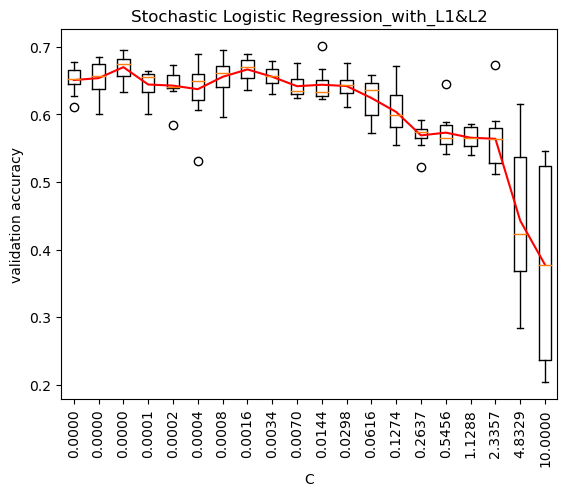


The higher acc one:  {'regularizations': 'L1&L2', 'C': 4.281332398719396e-05, 'Average acc': 0.6700956937799043}
Hessian Logistic Regression
regularizations: None
========C does not matter ==================
C: 10.0000 	Average acc: 0.668421
regularizations: L1
C: 0.0000 	Average acc: 0.697608
C: 0.0000 	Average acc: 0.717464
C: 0.0000 	Average acc: 0.710766
C: 0.0001 	Average acc: 0.700957
C: 0.0002 	Average acc: 0.698445
C: 0.0004 	Average acc: 0.705263
C: 0.0008 	Average acc: 0.702512
C: 0.0016 	Average acc: 0.703589
C: 0.0034 	Average acc: 0.709450
C: 0.0070 	Average acc: 0.707057
C: 0.0144 	Average acc: 0.707057
C: 0.0298 	Average acc: 0.705024
C: 0.0616 	Average acc: 0.704067
C: 0.1274 	Average acc: 0.700478
C: 0.2637 	Average acc: 0.702273
C: 0.5456 	Average acc: 0.703947
C: 1.1288 	Average acc: 0.698445
C: 2.3357 	Average acc: 0.697488
C: 4.8329 	Average acc: 0.709330
C: 10.0000 	Average acc: 0.656220


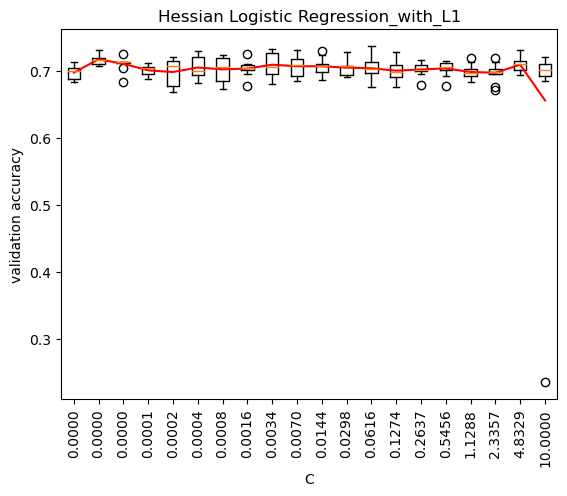

regularizations: L2
C: 0.0000 	Average acc: 0.702990
C: 0.0000 	Average acc: 0.703230
C: 0.0000 	Average acc: 0.699641
C: 0.0001 	Average acc: 0.696172
C: 0.0002 	Average acc: 0.710287
C: 0.0004 	Average acc: 0.703230
C: 0.0008 	Average acc: 0.709450
C: 0.0016 	Average acc: 0.712799
C: 0.0034 	Average acc: 0.703469
C: 0.0070 	Average acc: 0.701555
C: 0.0144 	Average acc: 0.706938
C: 0.0298 	Average acc: 0.700000
C: 0.0616 	Average acc: 0.711603
C: 0.1274 	Average acc: 0.711483
C: 0.2637 	Average acc: 0.709091
C: 0.5456 	Average acc: 0.700120
C: 1.1288 	Average acc: 0.707895
C: 2.3357 	Average acc: 0.703230
C: 4.8329 	Average acc: 0.691627
C: 10.0000 	Average acc: 0.409689


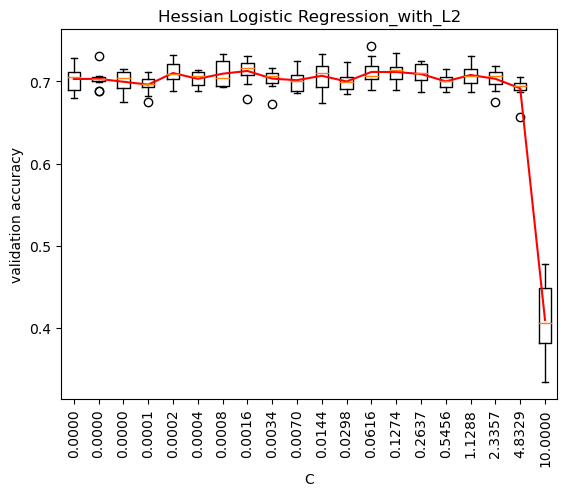

regularizations: L1&L2
C: 0.0000 	Average acc: 0.700957
C: 0.0000 	Average acc: 0.705861
C: 0.0000 	Average acc: 0.707536
C: 0.0001 	Average acc: 0.705024
C: 0.0002 	Average acc: 0.700837
C: 0.0004 	Average acc: 0.707775
C: 0.0008 	Average acc: 0.708014
C: 0.0016 	Average acc: 0.696411
C: 0.0034 	Average acc: 0.709569
C: 0.0070 	Average acc: 0.706459
C: 0.0144 	Average acc: 0.707057
C: 0.0298 	Average acc: 0.707775
C: 0.0616 	Average acc: 0.707416
C: 0.1274 	Average acc: 0.708373
C: 0.2637 	Average acc: 0.713038
C: 0.5456 	Average acc: 0.700000
C: 1.1288 	Average acc: 0.701675
C: 2.3357 	Average acc: 0.696770
C: 4.8329 	Average acc: 0.703828
C: 10.0000 	Average acc: 0.401196


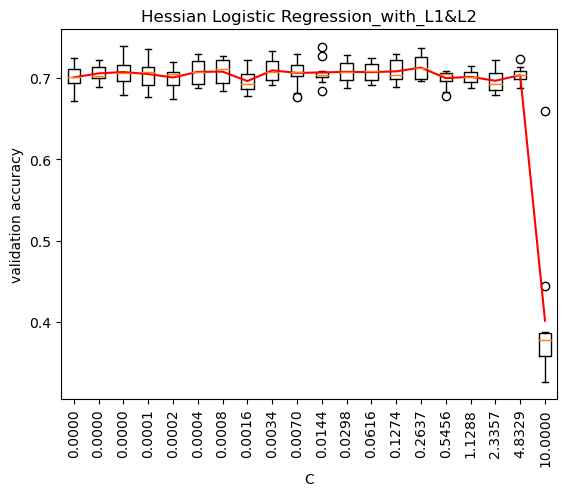


The higher acc one:  {'regularizations': 'L1', 'C': 2.06913808111479e-05, 'Average acc': 0.7174641148325358}
BFGS Logistic Regression
regularizations: None
========C does not matter ==================
C: 10.0000 	Average acc: 0.705144
regularizations: L1
C: 0.0000 	Average acc: 0.704067
C: 0.0000 	Average acc: 0.708014
C: 0.0000 	Average acc: 0.706340
C: 0.0001 	Average acc: 0.701435
C: 0.0002 	Average acc: 0.703230
C: 0.0004 	Average acc: 0.703349
C: 0.0008 	Average acc: 0.708134
C: 0.0016 	Average acc: 0.702512
C: 0.0034 	Average acc: 0.702871
C: 0.0070 	Average acc: 0.684091
C: 0.0144 	Average acc: 0.676675
C: 0.0298 	Average acc: 0.663517
C: 0.0616 	Average acc: 0.650120
C: 0.1274 	Average acc: 0.630981
C: 0.2637 	Average acc: 0.650598
C: 0.5456 	Average acc: 0.206818
C: 1.1288 	Average acc: 0.200000
C: 2.3357 	Average acc: 0.203110
C: 4.8329 	Average acc: 0.196053
C: 10.0000 	Average acc: 0.199043


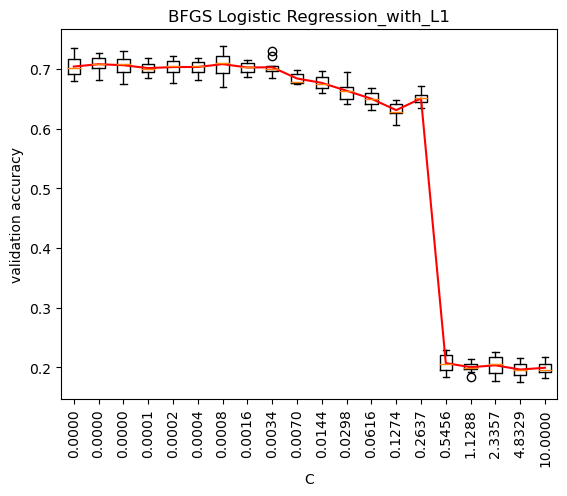

regularizations: L2
C: 0.0000 	Average acc: 0.708134
C: 0.0000 	Average acc: 0.702153
C: 0.0000 	Average acc: 0.706938
C: 0.0001 	Average acc: 0.701675
C: 0.0002 	Average acc: 0.706100
C: 0.0004 	Average acc: 0.708254
C: 0.0008 	Average acc: 0.695694
C: 0.0016 	Average acc: 0.703947
C: 0.0034 	Average acc: 0.694976
C: 0.0070 	Average acc: 0.685048
C: 0.0144 	Average acc: 0.676196
C: 0.0298 	Average acc: 0.670574
C: 0.0616 	Average acc: 0.653708
C: 0.1274 	Average acc: 0.651794
C: 0.2637 	Average acc: 0.637919
C: 0.5456 	Average acc: 0.600598
C: 1.1288 	Average acc: 0.559091
C: 2.3357 	Average acc: 0.575239
C: 4.8329 	Average acc: 0.559689
C: 10.0000 	Average acc: 0.566866


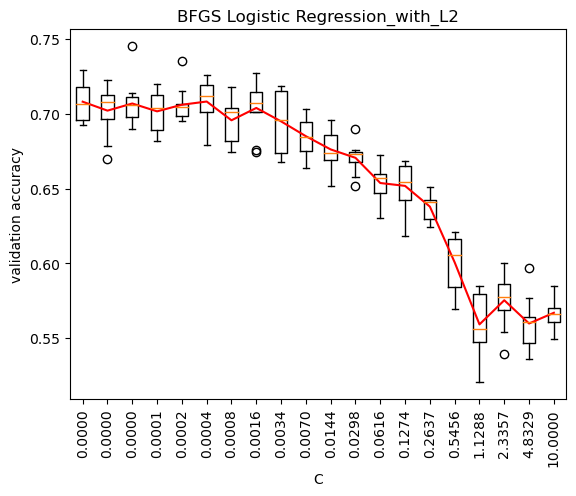

regularizations: L1&L2
C: 0.0000 	Average acc: 0.712321
C: 0.0000 	Average acc: 0.710766
C: 0.0000 	Average acc: 0.702033
C: 0.0001 	Average acc: 0.700000
C: 0.0002 	Average acc: 0.713876
C: 0.0004 	Average acc: 0.705263
C: 0.0008 	Average acc: 0.701077
C: 0.0016 	Average acc: 0.702033
C: 0.0034 	Average acc: 0.681220
C: 0.0070 	Average acc: 0.680383
C: 0.0144 	Average acc: 0.672847
C: 0.0298 	Average acc: 0.659928
C: 0.0616 	Average acc: 0.651675
C: 0.1274 	Average acc: 0.609809
C: 0.2637 	Average acc: 0.574043
C: 0.5456 	Average acc: 0.194737
C: 1.1288 	Average acc: 0.201435
C: 2.3357 	Average acc: 0.208134
C: 4.8329 	Average acc: 0.197368
C: 10.0000 	Average acc: 0.201675


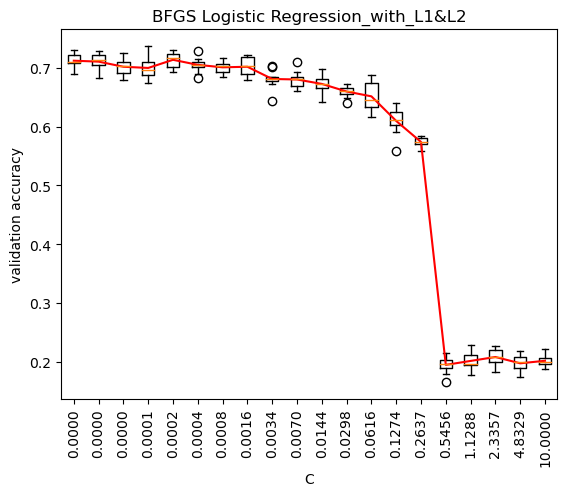


The higher acc one:  {'regularizations': 'L1&L2', 'C': 0.00018329807108324357, 'Average acc': 0.7138755980861246}
CPU times: user 3h 31min 21s, sys: 21min 55s, total: 3h 53min 16s
Wall time: 35min 46s


In [24]:
%%time
# Some display settings 
pd.set_option('display.width', 10000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# eta_test = [0.1]
# iterations_test = [100]

costs = np.logspace(-5, 1, 20)

# costs = [0.001,0.01,0.1,0.2,0.3,0.5,1]

regularizations_test = ['None', 'L1', 'L2', 'L1&L2']
solvers_test = [SteepestAscentLogisticRegression, StochasticLogisticRegression, HessianBinaryLogisticRegression,
                BFGSBinaryLogisticRegression]

solvers_list = ['Steepest Ascent Logistic Regression', 'Stochastic Logistic Regression', 'Hessian Logistic Regression',
                'BFGS Logistic Regression']

def lr_explor_adjustable(eta_val=0.1,
                         iteration_val=100,
                         line_iters_val=0,
                         cost_val=0.01,
                         regularization_val=0,
                         solver_val=SteepestAscentLogisticRegression):
    lr_clf = MultiClassLogisticRegression(eta=eta_val,
                                          iterations=iteration_val,
                                          line_iters=line_iters_val,
                                          C=float(cost_val),
                                          regularization=regularization_val,
                                          solver=solver_val)
    acc = []
    for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X, y)):
        lr_clf.fit(X[train_indices], y[train_indices])  # train object
        y_hat = lr_clf.predict(X[test_indices])  # get test set predictions
        acc.append(mt.accuracy_score(y[test_indices], y_hat))
    acc = np.array(acc)
    return acc


def draw_graph(accs, aacs_mean, title):
    plt.boxplot(accs)

    plt.xticks(range(1, len(costs) + 1), ['%.4f' % (c) for c in costs], rotation='vertical')
    plt.plot(range(1, len(costs) + 1), accs_mean, c='red')
    plt.xlabel('C')
    plt.ylabel('validation accuracy')
    plt.title(title)
    plt.show()


# eta_test = 0.1
# iterations_test = 100

accs = []
accs_mean = []
acc_best_4_each_slov = []
c = 10 # init c
for solv in solvers_test:
    #     print(str(solv))
    print(solvers_list[solvers_test.index(solv)])
    current_acc = 0
    current_c = 0
    current_regu = ''
    temp_best_optimization_technique_and_C = ''

    for regu_index in range(len(regularizations_test)):
        print('regularizations:',str(regularizations_test[regu_index]))
        accs = []
        accs_mean = []
        if regu_index == 0:
            # If we do not use the regularizations, C means nothing
            print('========C does not matter ==================')
            if solvers_test.index(solv) == 0:  # SteepestAscentLogisticRegression
                #                 line_iters_temp = 5
                temp_acc = (lr_explor_adjustable(eta_val=eta_test,
                                                 iteration_val=iterations_test,
                                                 line_iters_val=5,
                                                 cost_val=10,
                                                 regularization_val=regu_index,
                                                 solver_val=solv))

            else:
                #                 line_iters_temp = 0
                temp_acc = (lr_explor_adjustable(eta_val=eta_test,
                                                 iteration_val=iterations_test,

                                                 cost_val=10,
                                                 regularization_val=regu_index,
                                                 solver_val=solv))

            accs.append(temp_acc)
            temp_acc_mean = np.mean(temp_acc)
            accs_mean.append(temp_acc_mean)
            print('C:', '%.4f' % (c), '\tAverage acc:', '%.6f' % (temp_acc_mean))
            if temp_acc_mean > current_acc:
                temp_best_optimization_technique_and_C = {'regularizations': regularizations_test[regu_index], 'C': c,
                                                          'Average acc': temp_acc_mean}
                current_c = 10
                current_acc = temp_acc_mean
                current_regu = regularizations_test[regu_index]
            print('============================================')
        else:
            for c in costs:

                #                 eta_test = 0.1
                #                 iterations_test = 10
                if solvers_test.index(solv) == 0:  # SteepestAscentLogisticRegression
                    #                 line_iters_temp = 5
                    temp_acc = (lr_explor_adjustable(eta_val=eta_test,
                                                     iteration_val=iterations_test,
                                                     line_iters_val=5,
                                                     cost_val=c,
                                                     regularization_val=regu_index,
                                                     solver_val=solv))

                else:
                    #                 line_iters_temp = 0
                    temp_acc = (lr_explor_adjustable(eta_val=eta_test,
                                                     iteration_val=iterations_test,

                                                     cost_val=c,
                                                     regularization_val=regu_index,
                                                     solver_val=solv))

                accs.append(temp_acc)
                temp_acc_mean = np.mean(temp_acc)
                accs_mean.append(temp_acc_mean)
                print('C:', '%.4f' % (c), '\tAverage acc:', '%.6f' % (temp_acc_mean))
                if temp_acc_mean > current_acc:
                    temp_best_optimization_technique_and_C = {'regularizations': regularizations_test[regu_index], 'C': c,
                                                              'Average acc': temp_acc_mean}
                    current_c = c
                    current_acc = temp_acc_mean
                    current_regu = regularizations_test[regu_index]
            draw_graph(accs=accs, aacs_mean=accs_mean,
                       title=str(solvers_list[solvers_test.index(solv)] + '_with_' + regularizations_test[regu_index]))
    acc_best_4_each_slov.append([temp_best_optimization_technique_and_C])
    print('\nThe higher acc one: ', temp_best_optimization_technique_and_C)
    print('================================================')


In [25]:
best_acc_df = pd.DataFrame()
for i in (acc_best_4_each_slov):
    best_acc_df = best_acc_df.append(i)
best_acc_df.index = solvers_list
# print(best_acc_df)

For each solver, we collect the highest average accuracy with specific parameters and make them as a DataFrame.

In [26]:
best_acc_df

,regularizations,C,Average acc
Steepest Ascent Logistic Regression,L1&L2,0.000785,0.701555
Stochastic Logistic Regression,L1&L2,0.000043,0.670096
Hessian Logistic Regression,L1,0.000021,0.717464
BFGS Logistic Regression,L1&L2,0.000183,0.713876


We can access the DataFrame to get the value to compare with other methods.

In [27]:
best_acc_we_have = np.argmax(best_acc_df.iloc[:,2]) # get max acc index

# print(best_acc_df.iloc[best_acc_we_have,:])
print('Slover : ',(best_acc_df.index.values[best_acc_we_have]))
print('Regularization : ',best_acc_df.iloc[best_acc_we_have,:][0])
print('C : ',best_acc_df.iloc[best_acc_we_have,:][1])
print('Avg accuracy : ',best_acc_df.iloc[best_acc_we_have,:][2])

Slover :  Hessian Logistic Regression
Regularization :  L1
C :  2.06913808111479e-05
Avg accuracy :  0.7174641148325358


#### 2.2.2 Check the quality
Firstly, we check the model's average accuracy for either train dataset or test dataset.

In [28]:

costs = np.logspace(-5,1,20)


regularizations_test = ['None','L1','L2','L1&L2']
solvers_test = [SteepestAscentLogisticRegression, StochasticLogisticRegression, HessianBinaryLogisticRegression, BFGSBinaryLogisticRegression]

solvers_list = ['Steepest Ascent Logistic Regression', 'Stochastic Logistic Regression', 'Hessian Logistic Regression',
                'BFGS Logistic Regression']
eta_test = 0.1
iterations_test = 10
if best_acc_we_have == 2:
    line_iters_val = 5
else:
    line_iters_val = 0
    



lr_best = MultiClassLogisticRegression(eta = eta_test,
                                    iterations=iterations_test,
#                                      line_iters=line_iters_val,
                                    C = float(best_acc_df.iloc[best_acc_we_have,:][1]),
                                    regularization = regularizations_test.index(best_acc_df.iloc[best_acc_we_have,:][0]),
                                     solver=solvers_test[best_acc_we_have]
                                    
                                     ) # get object

mean_accuracy_4_train = []
mean_accuracy_4_test = []

for i in range(10):
    print('Try time', i+1 , ':')
    accuracy_4_train = []
    accuracy_4_test = []
    for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
        lr_best.fit(X[train_indices],y[train_indices])  # train object
        yhat = lr_best.predict(X[train_indices])
        accuracy_4_train.append(accuracy_score(y[train_indices],yhat))
        yhat = lr_best.predict(X[test_indices])
        accuracy_4_test.append(accuracy_score(y[test_indices],yhat))
    accuracy_4_train = np.array(accuracy_4_train)
    accuracy_4_test = np.array(accuracy_4_test)
    print('Train avg acc: ',(np.mean(accuracy_4_train)),' Test avg acc: ', (np.mean(accuracy_4_test)))
    mean_accuracy_4_train.append(np.mean(accuracy_4_train))
    mean_accuracy_4_test.append(np.mean(accuracy_4_test))

Try time 1 :
Train avg acc:  0.6983837174498653  Test avg acc:  0.7017942583732057
Try time 2 :
Train avg acc:  0.6999700688416641  Test avg acc:  0.6937799043062202
Try time 3 :
Train avg acc:  0.7001496557916791  Test avg acc:  0.6940191387559809
Try time 4 :
Train avg acc:  0.7002095181083507  Test avg acc:  0.6952153110047847
Try time 5 :
Train avg acc:  0.7011373840167614  Test avg acc:  0.6941387559808613
Try time 6 :
Train avg acc:  0.6987428913498952  Test avg acc:  0.70311004784689
Try time 7 :
Train avg acc:  0.698263992816522  Test avg acc:  0.7039473684210525
Try time 8 :
Train avg acc:  0.6997605507333133  Test avg acc:  0.6992822966507177
Try time 9 :
Train avg acc:  0.699131996408261  Test avg acc:  0.6986842105263158
Try time 10 :
Train avg acc:  0.6997306195749775  Test avg acc:  0.6949760765550239


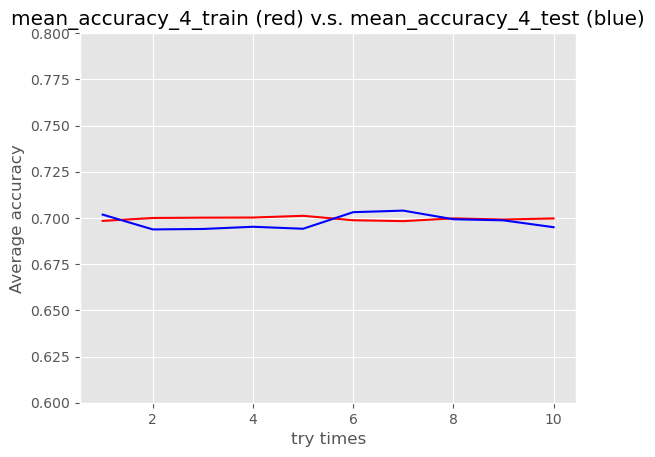

In [29]:
plt.style.use('ggplot')
plt.plot(range(1,11),mean_accuracy_4_train,c = 'red')
plt.plot(range(1,11),mean_accuracy_4_test,c = 'blue')
# plt.plot(range(1,num_cv_iterations+1),acc_best,c = 'cyan')
plt.title('mean_accuracy_4_train (red) v.s. mean_accuracy_4_test (blue)')
plt.xlabel('try times')
plt.ylim(0.6, 0.8)
plt.ylabel('Average accuracy')

plt.show()

From the result above we can see the trainning set and test set have similar accuracy, which means there is no indication that overfitting has occurred.

I think there is some kind of data snooping, because when we choose these hyperparameter by check the higher accuracy, it would indirectly indicate the test data, which could be a problem.

A better way is to split the data set to 3 parts: train set, valid set and test set( We do need to make sure there is enough data and even distribution in each set). That is, by using the valid set to determine the hyperparameter, we can evaluate the model relatively safely. K-fold cross validation could be a good choice when we have inadequate samples.

#### 2.2.3  Compare to the scikit-learn.
Here we use 'liblinear' and 'lbfgs' as control group. 

In [30]:
%%time
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

lr_sk = SKLogisticRegression(solver='liblinear') # all params default


acc_sk_liblinear = []


for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_sk.fit(X[train_indices],y[train_indices])
    yhat = lr_sk.predict(X[test_indices])
    acc_sk_liblinear.append(accuracy_score(y[test_indices],yhat))

acc_sk_liblinear = np.array(acc_sk_liblinear)
print('acc_sk_liblinear: ',(np.mean(acc_sk_liblinear)))

acc_sk_liblinear:  0.7065789473684211
CPU times: user 339 ms, sys: 80.6 ms, total: 419 ms
Wall time: 62.5 ms


In [31]:
%%time
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

lr_sk = SKLogisticRegression(solver='lbfgs') # all params default


acc_sk_lbfgs = []


for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_sk.fit(X[train_indices],y[train_indices])
    yhat = lr_sk.predict(X[test_indices])
    acc_sk_lbfgs.append(accuracy_score(y[test_indices],yhat))

acc_sk_lbfgs = np.array(acc_sk_lbfgs)
print('acc_sk_lbfgs: ',(np.mean(acc_sk_lbfgs)))

acc_sk_lbfgs:  0.7151913875598086
CPU times: user 2.06 s, sys: 449 ms, total: 2.51 s
Wall time: 367 ms


Use our best model to caculate.

In [32]:
%%time
acc_best = []
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_best.fit(X[train_indices],y[train_indices])  # train object

    yhat = lr_best.predict(X[test_indices])
    acc_best.append(accuracy_score(y[test_indices],yhat))

acc_best = np.array(acc_best)
print('acc_best: ',(np.mean(acc_best)))


acc_best:  0.6927033492822967
CPU times: user 22.4 s, sys: 2.43 s, total: 24.9 s
Wall time: 3.69 s


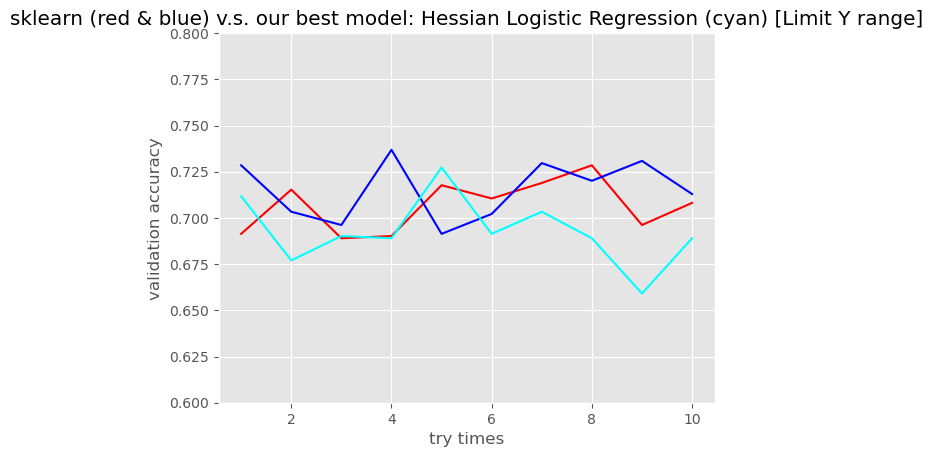

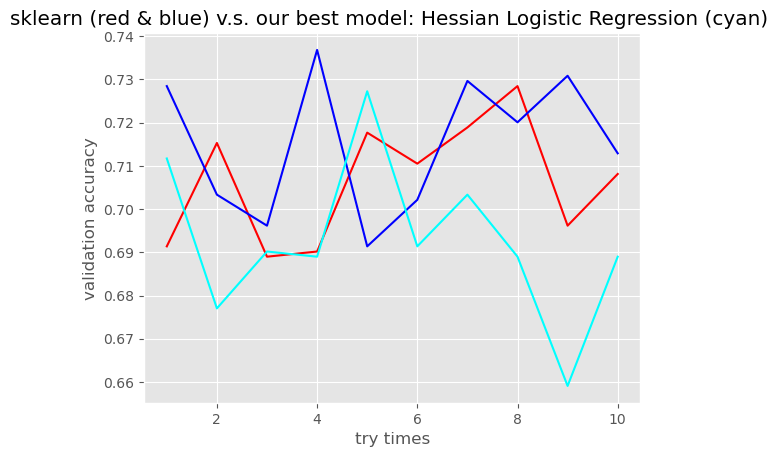

In [33]:
plt.style.use('ggplot')
plt.plot(range(1,num_cv_iterations+1),acc_sk_liblinear,c = 'red')
plt.plot(range(1,num_cv_iterations+1),acc_sk_lbfgs,c = 'blue')
plt.plot(range(1,num_cv_iterations+1),acc_best,c = 'cyan')
plt.title('sklearn (red & blue) v.s. our best model: '+ str(solvers_list[best_acc_we_have]) + ' (cyan) [Limit Y range]')
plt.xlabel('try times')
plt.ylabel('validation accuracy')
plt.ylim(0.6, 0.8)

plt.show()

plt.plot(range(1,num_cv_iterations+1),acc_sk_liblinear,c = 'red')
plt.plot(range(1,num_cv_iterations+1),acc_sk_lbfgs,c = 'blue')
plt.plot(range(1,num_cv_iterations+1),acc_best,c = 'cyan')
plt.title('sklearn (red & blue) v.s. our best model: '+ str(solvers_list[best_acc_we_have]) + ' (cyan) ')
plt.xlabel('try times')
plt.ylabel('validation accuracy')

plt.show()

The cyan color one shows the accuracy of our best model, compare to other model it require a bit more time and the accuracy do not have obviously advantage.
One possible reason is that the sklearn have a higher efficiency when computing(They are base on the C++, which is faster than python). Also, the sklearn do have some algorithm to improve the computing.

## 3. Deployment

For a deployed machine learning model, we would prefer to use the scikit-learn implmentation. The biggest reason is that our implementation could achieve similar acurracy as scikit-learn implementation with similar amount of time. With a long running time or a lower accuracy, the model will either take too long to run, or be underpeforming when it is scaled to a larger dataset,which would have make the model become pretty useless. For our specific purpose of classfying abalones ages, none of our classification methods were able to achieve a very high accuracy, so that time would have a higher weight when we are choosing the model to deploy. Although our best method, Hessian Logistic Regression have almost the same accuracy comparing to the scikit-learn implementation, it has a significant time disadvantage. Because of this, we would perfer to use the scikit-learn implmentation. 

## 4. Exceptional Work

We choose to implement an optimization technique for logistic regression using mean square error as objective function (instead of maximum likelihood)

Use the MSE (mean squared error) objective function:

$$ J(\mathbf{W}) = \sum_k^M (\mathbf{y}^{(k)}-\mathbf{a}^{(L)})^2 $$

`l(w)`:objective function `H[l(w)]`: Hessian 

$$ \mathbf{w} \leftarrow \mathbf{w} + \eta \cdot \underbrace{\mathbf{H}[l(\mathbf{w})]^{-1}}_{\text{inverse Hessian}}\cdot\underbrace{\nabla l(\mathbf{w})}_{\text{gradient}}$$

Derive the gradient updates for the Hessian and use Newton's method to update the values of "w". 

$$  \frac{\partial J(\mathbf{W})}{\partial [\mathbf{z}^{(2)}]^{(k)}}  = -2\left(\mathbf{y}^{(k)}-{[\mathbf{g}]^{(k)}}\right)*{[\mathbf{g}]^{(k)}}*\left(1-{[\mathbf{g}]^{(k)}}\right) $$

$$ \mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \underbrace{\left[\mathbf{X}^T \cdot \text{diag}\left[(\mathbf -2 * {y}^{(k)}-{[\mathbf{g}]^{(k)}}\right)*{[\mathbf{g}]^{(k)}}*\left(1-{[\mathbf{g}]^{(k)}}\right)] \cdot \mathbf{X}\right]^{-1} }_{\text{inverse Hessian}} \cdot \underbrace{\mathbf{X}*y_{diff}}_{\text{gradient}}$$

In [34]:
class MSEHessianBinaryLogisticRegression(BinaryLogisticRegression):
    # just overwrite gradient function
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(-2*(y-g)*g*(1-g)) @ X # calculate the hessian with the second derivative of the MSE function
        
        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape) 
        
        if self.regularization == 0:
            gradient = gradient
        elif self.regularization == 1:
            gradient[1:] += -np.sign(self.w_[1:]) * self.C
        elif self.regularization == 2:
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.regularization == 3:
            gradient[1:] += -np.sign(self.w_[1:]) * self.C - 2 * self.w_[1:] * self.C
            
        return pinv(hessian) @ gradient

In [35]:
def lr_explor_adjustable_mse(eta_val = 0.1,
                         iteration_val = 100,
                         cost_val = 0.01,
                         regularization_val = 0,
                         solver_val = HessianBinaryLogisticRegression):
    lr_clf = MultiClassLogisticRegression(eta=eta_val,
                                          iterations=iteration_val,
                                          C=float(cost_val),
                                          regularization=regularization_val,
                                          solver=solver_val)
    acc = []
    for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
        lr_clf.fit(X[train_indices],y[train_indices])  # train object
        y_hat = lr_clf.predict(X[test_indices]) # get test set predictions
        acc.append(mt.accuracy_score(y[test_indices],y_hat))
    acc = np.array(acc)
    return acc

def comparasion(solver):
    eta_test = 0.1
    iterations_test = 10
    costs = np.logspace(-5,1,20)
    regularizations_test = ['None','L1','L2','L1&L2']
    accs = []
    accs_mean = []

    max_acc = 0
    max_acc_c = 0
    
    if solver == MSEHessianBinaryLogisticRegression:
        solver_name = 'Logistic Regression with MSE'
    else:
        solver_name = 'Logistic Regression with MLE'

    for regu in range(len(regularizations_test)):
        accs = []
        accs_mean = []
        if regu == 0:
            temp_acc = lr_explor_adjustable_mse(eta_val = eta_test,
                             iteration_val = iterations_test,
                             cost_val = 0.01,
                             regularization_val = regu,
                             solver_val = solver)
            accs.append(temp_acc)
            temp_acc_mean = np.mean(temp_acc)
            accs_mean.append(temp_acc_mean)

        else:
            for c in costs:
                temp_acc = lr_explor_adjustable_mse(eta_val = eta_test,
                             iteration_val = iterations_test,
                             cost_val = 0.01,
                             regularization_val = regu,
                             solver_val = solver)
                accs.append(temp_acc)
                temp_acc_mean = np.mean(temp_acc)
                accs_mean.append(temp_acc_mean)

                if temp_acc_mean > max_acc:
                    max_acc = temp_acc_mean
                    max_acc_regu = regu
                    max_acc_c = c
    
    print('Method:',solver_name)
    print('Max Accuracy:', max_acc)
    print('C =',max_acc_c)
    print('Regularizations:',regularizations_test[max_acc_regu])

In [36]:
%%time
comparasion(MSEHessianBinaryLogisticRegression)

Method: Logistic Regression with MSE
Max Accuracy: 0.3745215311004785
C = 4.832930238571752
Regularizations: L1
CPU times: user 21min 27s, sys: 2min 17s, total: 23min 45s
Wall time: 3min 25s


In [37]:
%%time
comparasion(HessianBinaryLogisticRegression)

Method: Logistic Regression with MLE
Max Accuracy: 0.7090909090909092
C = 2.06913808111479e-05
Regularizations: L2
CPU times: user 21min 58s, sys: 2min 22s, total: 24min 20s
Wall time: 3min 31s


Maximum likelihood estimation (MLE) is a method of estimating the parameters of a probability distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable. 
Mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors — that is, the average squared difference between the estimated values and the actual value.
Reference: https://medium.com/analytics-vidhya/mse-vs-mle-for-linear-regression-f4ce3f6b990e

From the result shown above, we can see that there is a big drop on accuracy of logistic regression using mean square error than logistic regression using maximum likelihood on our dataset. Therefore, we prefer logistic regression using maximum likelihood as objective function on our dataset. 